In [1]:
#Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Import data in Python

In [2]:
data=pd.read_csv(r'C:\Users\USER\Downloads\car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
data.info

<bound method DataFrame.info of      Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]>

In [6]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [ ]:
## Check correlation

In [7]:
corrmatrix=data.corr()

<AxesSubplot:>

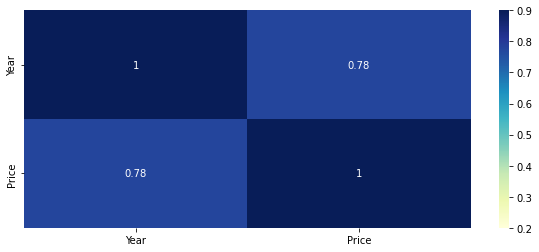

In [8]:
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=0.2, vmax=0.9, annot=True, cmap='YlGnBu')

# Linear Regression

In [9]:
x = data.drop(['Price'], axis =1)
y = data['Price']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size=0.2)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
lr = LinearRegression()

model = lr.fit(x_train,y_train)

predictions = model.predict(x_test)

In [15]:
print('Mean squared error is :',mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))

Mean squared error is : 4326906256.829671
R squared value is : 0.36759313425902185


# predict car price in 2022

In [16]:
lr.coef_

array([47608.56780808])

In [17]:
lr.intercept_

-95520922.49198581

In [18]:
#y = m*x+b
y =47608.56780808*2022+-95520922.49198581

In [19]:
y

743601.6159519404

# Lasso Regression

In [21]:
from sklearn.linear_model import Lasso

In [22]:
x = data.drop(['Price'], axis =1)
y = data['Price']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size=0.2)

In [24]:
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [25]:
lasso.score(x_test, y_test),lasso.score(x_train, y_train)

(0.3675999284778446, 0.6389354253276789)

In [26]:
print(lasso.score(x,y))

0.5928209553736442


In [27]:
mean_squared_error = np.mean((y_pred - y_test)**2)

In [28]:
print("Mean squared error on test set", mean_squared_error)

Mean squared error on test set 4326859771.015669


In [29]:
lasso_coeff = pd.DataFrame()

lasso_coeff["Columns"] = x_train.columns

lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

  Columns  Coefficient Estimate
0    Year            47608.1556
